In [63]:
import numpy as np


class planet:
    def __init__(self,
                 r=[[1.5], [0], [0]],
                 v=[[0], [0.6], [0]],
                 R=0,
                 E=0,
                 A=1,):
        
        self.r = np.array(r, dtype=np.float64)  # r0
        self.v = np.array(v, dtype=np.float64)  # v0
        self.r = self.r - self.v*dt/2
        self.R = self.r
        self.A = A
        e0 = (self.v[0]**2 + self.v[1]**2 + self.v[2]**2) - self.A / (self.r[0]**2 + self.r[1]**2 + self.r[2]**2)**(1/2)
        self.E = np.array(e0, dtype=np.float64)
        
    
    def step(self, dt):
        self.r += self.v*dt
        self.R = np.append(self.R, self.r, axis=1)
        e = (self.v[0]**2 + self.v[1]**2 + self.v[2]**2) - self.A / (self.r[0]**2 + self.r[1]**2 + self.r[2]**2)**(1/2)
        self.v += - self.A * (self.r/(self.r[0]**2 + self.r[1]**2 + self.r[2]**2)**(3/2)) *dt
        self.E = np.append(self.E, e)



<IPython.core.display.Javascript object>


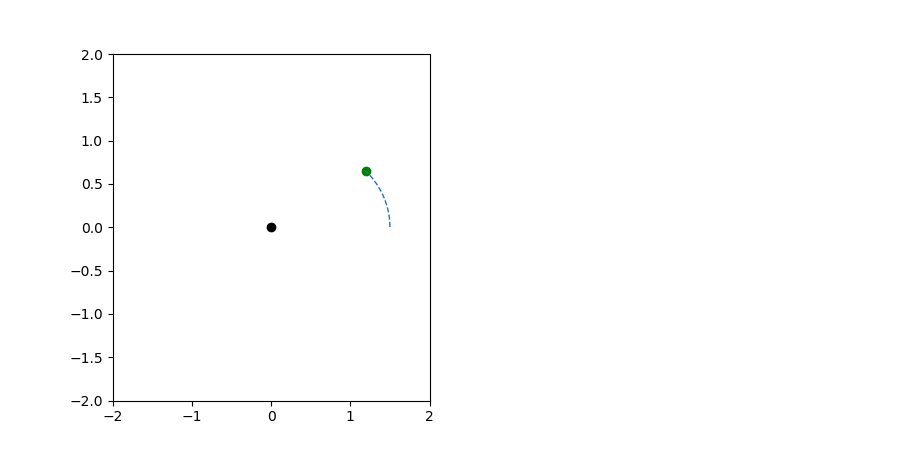

In [64]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

fig = plt.figure(figsize=(9, 4.5))
ax1 = fig.add_subplot(121, xlim=(-2, 2), ylim=(-2, 2))
# ax2 = fig.add_subplot(122, xlim=(0, 2), ylim=(-0.5, 1.5))


def init():
    pl_dot.set_data([], [])
    rphi.set_data([], [])
    # energy.set_data([], [])
    return pl_dot, rphi, # energy


def redraw(i, pl_dot, rphi, p, dt):
    p.step(dt)
    
    pl_dot.set_data(p.r[:2])
    rphi.set_data(p.R[:2])
    # energy.set_data((R[0]**2 + R[1]**2 + R[2]**2)**(1/2), E)
    return pl_dot, rphi, # energy


dt = 0.01
p = planet()

pl_dot, = ax1.plot(p.r[:2], 'bo', c='green', lw=1)
rphi, = ax1.plot(p.r[:2], ls='--', lw=1) 
center, = ax1.plot(0, 0, 'bo', c='black', lw=3)
# energy, = ax2.plot([], [], c='green', lw=1)

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=600,
                               init_func=init,
                               interval=10,
                               blit=True,
                               fargs=(pl_dot,
                                      rphi,
                                      # energy,
                                      p, dt,)
                               )